# 1. Perkenalan

```
===========================================================================================
Milestone I

Nama : Yohanes Raditya Wirawan Aruan
Batch : HCK-022

Milestone ini dibuat untuk menganalisa kepuasan penumpang sebuah maskapai 
============================================================================================
```

# 2. Identifikasi Masalah

```
Memahami faktor-faktor yang mempengaruhi kepuasan penumpang maskapai. Hal ini penting bagi maskapai untuk meningkatkan layanan dan mempertahankan penumpang 
```

## 2.1 Topik Permasalahan

```
a. Memahami faktor kepuasan pelanggan 
b. Perbedaan kepuasaan di berbagai segmen 
```

## 2.2 SMART Analysis and Problem Statement
```

Specific = Menganalisis data kepuasan penumpang maskapai untuk meningkatkan kepuasan penumpang dan loyal customer. 

Measurable = Meningkatkan persentase kepuasan penumpang dari tipe loyal customer dari 48% menjadi 50%. 

Achievable = Kumpulan data berisi penumpang, detail penerbangan, dan layanan, sehingga memungkinkan untuk melakukan analisis yang diperlukan. 

Relevant = Memberikan wawasan berharga bagi maskapai untuk meningkatkan kepuasan pelanggan yang berpotensi meningkatkan loyalitas dan profitabilitas pelanggan. 

Time-bound = Meningkatkan kepuasan penumpang dan peningkatan layanan maskapai untuk Q1 tahun 2025. 


Maskapai penerbangan menghadapi tantangan dalam mempertahankan tingkat kepuasan pelanggan, terutama di kalangan loyal customer. Saat ini, hanya 48% dari penumpang loyal yang merasa puas dengan layanan maskapai. Untuk meningkatkan loyalitas dan profitabilitas, maskapai perlu meningkatkan persentase kepuasan penumpang loyal menjadi 50% pada akhir Q1 tahun 2025. Analisis data penumpang, penerbangan, dan peringkat layanan akan digunakan untuk mengidentifikasi area perbaikan layanan yang paling berdampak terhadap kepuasan pelanggan, yang dapat membantu maskapai dalam memberikan pengalaman yang lebih baik dan memperkuat basis pelanggan setia mereka

```

## 2.3 Latar Belakang

```
Dalam industri penerbangan yang sangat kompetitif, kepuasan pelanggan merupakan faktor penting untuk meraih kesuksesan. Memahami penilaian dari kepuasan pelanggan yang dapat membantu maskapai meningkatkan layanan dan pada akhirnya meningkatkan profitabilitas 
```

## 2.4 Penjabaran Masalah


# 3. Data Loading

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Membuat function untuk membaca file csv
df_airlines = pd.read_csv("test.csv")

## 3.1 Data Exploration

In [15]:
# Membuat memunculkan semua kolom
pd.set_option('display.max_columns', None)

In [16]:
# Membuat mencari info dataframe
df_info_airlines = df_airlines.info()
df_info_airlines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

```
Insight: Dari data info diatas, dapat disimpulkan bawha data typennya sesuai dengan peruntukannya.
```

In [12]:
# Menampilkan kolom dari dataframe
df_airlines.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
# Menampilkan kesimpulan null
df_airlines.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


```
Insight: terdapat missing value di kolom Arrival Delay in Minutes. Hal ini dapat di atasi dengan handling missing value
```

In [10]:
df_airlines.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [13]:
# Menghitung nilai unique
df_airlines.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

```
Insight: terdapat kolom uniqe value di kolom id, flight distance, departure delay in minutes, dan arrival delay in minutes.
```

## 3.2 Data Summary

```
Dari menampilkan data info didapatkan sebuah informasi data type yang sesuai dengan peruntukkannya. Datatype integer terbaik untuk bilangan bulat dan mewakili jumlah, datatype float ideal untuk pengukuran dan desimal, datatype objek cocok untuk data kategori 

Dari menampilkan df_airlines.isnull().sum() menghasilkan jumlah nilai yang hilang di setiap kolom. Dan ditemukan di kolom Arrival Delay in Minutes terdapat 83 data yang hilang. Hal ini dapat diatasi dengan handling missing value. 

Dari menampilkan df_airlines.nunique() menghasilkan jumlah nilai unik di setiap kolom. Ditemukannya nilai jumlah unik di kolom id dan flight distance. Dari penemuan ini dapat dikatakan bahwa kolom id, flight distance, departure delay in minutes, dan arrival delay in minutes cenderung bersifat numerik.

    *id dan unnamed dapat dikatakan sebagai identifier 
    *age terdapat 75 nilai unik yang memungkinkan analisis berdasarkan kelompok usia 
    *Flight distance terdapat 3281 nilai unik nilai jumlah unik yang tinggi menunjukkan bahwa jarak penerbangan sangat bervariasi. Hal ini dapat dianalisis apakah jarak penerbangan memengaruhi kepuasan atau waktu delay

    *Departure delay in minutes bernilai 313 nilai unik dan arrival delay in minutes 320 nilai unik. Nilai unik yang relatif tinggi mennujukkan bahwa penundaan kebrangkatan dan kedatangan bervariasi. Hal ini dapat digunakan untuk menganalisis hubungan antara waktu penundaan dan kepuasan pelanggan

```

## 3.3 Mengecek missing value


In [17]:
df_airlines.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


# 4. Data Cleaning

## 4.1 Cleaning missing value

In [20]:
df_airlines['Arrival Delay in Minutes'].skew()

6.984497404158308

```
Insight: di kolom Arrival Delay in Minutes memiliki nilai skew 6.9 sehingga terindikasi distribusi data tidak normal sehingga untuk mengisi nilai missing digunakan nilai median sebagai representatif missing value.
```

In [21]:
df_airlines['Arrival Delay in Minutes'] = df_airlines['Arrival Delay in Minutes'].fillna(df_airlines['Arrival Delay in Minutes'].median())

```
Insight: mengisi missing value dengan median
```

In [22]:
df_airlines.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

```
Insight: mengecek missing value setelah diatasi 
```

In [63]:
df_airlines_clean = df_airlines.drop(columns='Unnamed: 0')

In [65]:
df_airlines_clean.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure_Delay_Category,Arrival_Delay_Category
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,Long Delay (>30 min),Long Delay (>30 min)
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,No Delay,No Delay
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,No Delay,No Delay
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,No Delay,Short Delay (0-15 min)
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,No Delay,Medium Delay (15-30 min)


```
Insight: di drop kolom 'unnamed 0' karena gadibutuhkan
```

In [66]:
df_airlines_clean.to_csv('maskapai1.csv', index = False)

# 5. Analisis dan Perhitungan

## 5.1 Perhitungan statistik deskriptif


### 1. Berapa presentase kepuasan pelanggan berdasarkan tipe customer? 

In [40]:
# Menghitung persentase kepuasan berdasarkan Customer Type
satisfaction_by_customer_type = df_airlines.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_customer_type *= 100  # Mengubah ke dalam bentuk persen
print(satisfaction_by_customer_type)

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   51.858148  48.141852
disloyal Customer                74.828089  25.171911


```
Insight: kode ini bertujuan untuk melakukan perhitungan persentase kepuasan pelanggan berdasarkan pelanggan(customer type). Dari hasil ini akan mendapatkan pandangan yang lebih mendalam mengenai bagaimana tingkat kepuasan pelanggan bervariasi berdasarkan jenis pelanggan, selain itu analisis ini dapat membantu dalam pengambilan keputusan strategis, seperti meningkatkan layanan kategori pelanggan tertentu yang memiliki tingkat ketidakpuasan yang lebih tinggi
```

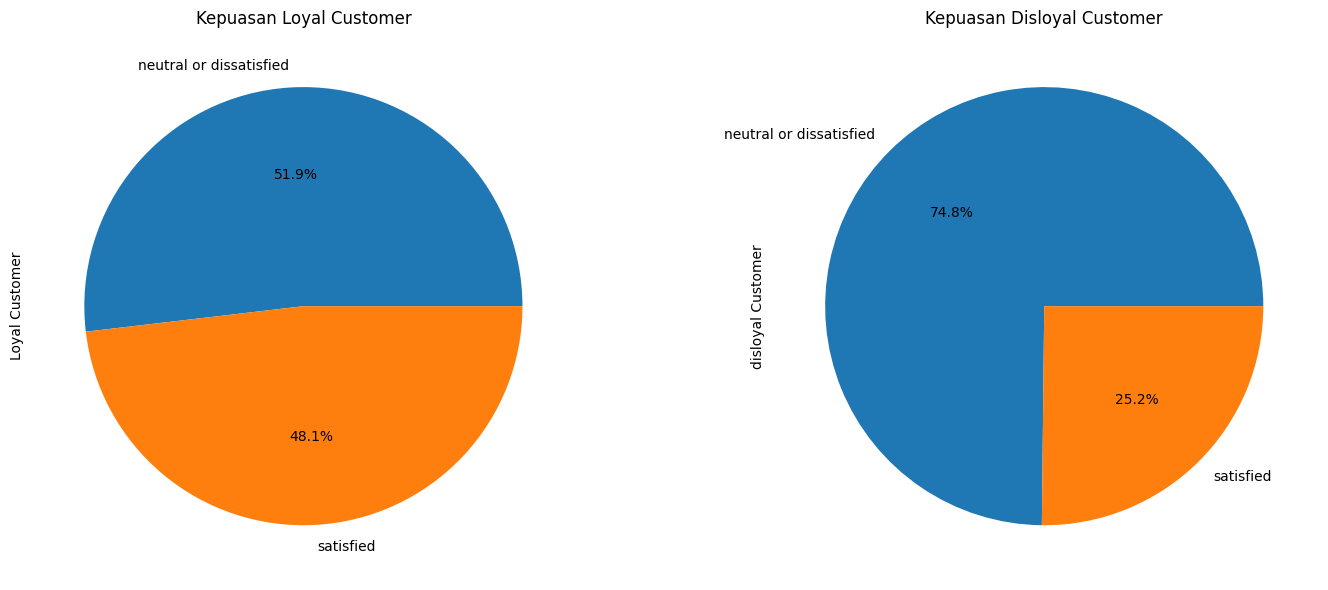

In [41]:
# Visualisasi dengan pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart untuk Loyal Customer
satisfaction_by_customer_type.loc['Loyal Customer'].plot(kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Kepuasan Loyal Customer')

# Pie chart untuk disloyal Customer
satisfaction_by_customer_type.loc['disloyal Customer'].plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Kepuasan Disloyal Customer')

plt.tight_layout()
plt.show()

In [26]:
# Menghitung persentase kepuasan berdasarkan Customer Type
satisfaction_by_customer_type = df_airlines.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_customer_type *= 100  # Mengubah ke dalam bentuk persen

print(satisfaction_by_customer_type)

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   51.858148  48.141852
disloyal Customer                74.828089  25.171911


```
Insight:Fokus Peningkatan Pelanggan Loyal: Ada peluang besar untuk meningkatkan kepuasan di kalangan pelanggan loyal, karena hampir setengah dari mereka masih merasa netral atau tidak puas. Ini bisa dilakukan melalui peningkatan kualitas layanan atau insentif tambahan untuk menjaga loyalitas mereka. 

Peluang Retensi Pelanggan Tidak Loyal: Sebagian besar pelanggan yang tidak loyal merasa tidak puas. Oleh karena itu, untuk memperbaiki retensi dan mengubah mereka menjadi pelanggan loyal, fokus perlu diberikan pada perbaikan layanan atau produk yang sesuai dengan kebutuhan mereka, serta strategi engagement yang lebih efektif
```

## 5.2 Perhitungan statistik inferensial

### 1. Apakah ada pengaruh kepuasan pelanggan terhadap kelas penumpang?

In [36]:
# Perhitungan kendall tau membandingkan class dan satisfaction
corr_tau, pval_k = stats.kendalltau(df_airlines['Class'], df_airlines['satisfaction'])
if pval_k < 0.05:
    print("Ada hubungan antara class dan satisfaction")
else:
    print("Tidak ada hubungan antara class dan satiscaftion")
#print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k:.2f}")

Ada hubungan antara class dan satisfaction


```
Analisis: Perhitungan korelasi antara class dan kepuasan pelanggan menggunakan kendall tau, dikarenakan yang di dikorelasikan adalah numerikal kontinus. Dengan penolakan H0 ditolak maka kesimpulan H1. 

Insight: Ditemukan hubungan yang signifikan sehingga dapat disimpulkan class adalah faktor yang mempengaruhi kepuasan pelanggan
```

### 2. Apakah faktor inflight service mempengaruhi kepuasan?

In [49]:
corr_tau, pval_k = stats.kendalltau(df_airlines['Inflight service'], df_airlines['satisfaction'])
if pval_k < 0.05:
    print("Ada hubungan antara Inflight service dan satisfaction")
else:
    print("Tidak ada hubungan antara Inflight service dan satiscaftion")
# print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k:.2f}")

Ada hubungan antara Inflight service dan satisfaction


```
Analisis: Perhitungan korelasi antara inflight service dan kepuasan pelanggan menggunakan kendall tau, dikarenakan yang di dikorelasikan adalah numerikal kontinus. Dengan penolakan H0 ditolak maka kesimpulan H1 

Insight: Ditemukan hubungan yang signifikan sehingga dapat disimpulkan inflight service adalah faktor yang mempengaruhi kepuasan pelanggan 
```

### 3. Apakah faktor food and drink mempengaruhi kepuasan?

In [38]:
corr_tau, pval_k = stats.kendalltau(df_airlines['Food and drink'], df_airlines['satisfaction'])
if pval_k < 0.05:
    print("Ada hubungan antara Food and drink dan satisfaction")
else:
    print("Tidak ada hubungan antara Food and drink dan satiscaftion")
#print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k:.2f}")

Ada hubungan antara Food and drink dan satisfaction


```
Analisis: Perhitungan korelasi antara food and drink dan kepuasan pelanggan menggunakan kendall tau, dikarenakan yang di dikorelasikan adalah numerikal kontinus. Dengan penolakan H0 ditolak maka kesimpulan H1 

Insight:Ditemukan hubungan yang signifikan sehingga dapat disimpulkan food and drink adalah faktor yang mempengaruhi kepuasan pelanggan 
```

### 4. Apakah faktor keterlambatan keberangkatan terhadap kepuasan mempengaruhi kepuasaan?

In [39]:

corr_tau, pval_k = stats.kendalltau(df_airlines['Departure Delay in Minutes'], df_airlines['satisfaction'])
if pval_k < 0.05:
    print("Ada hubungan antara Departure Delay in Minutes dan satisfaction")
else:
    print("Tidak ada hubungan antara Departure Delay in Minutes dan satiscaftion")
#print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k:.2f}")

Ada hubungan antara Departure Delay in Minutes dan satisfaction


```
Analisis: Perhitungan korelasi antara Departure Delay in Minutes dan kepuasan pelanggan menggunakan kendall tau, dikarenakan yang di dikorelasikan adalah numerikal kontinus. Dengan penolakan H0 ditolak maka kesimpulan H1 

Insight: Ditemukan hubungan yang signifikan sehingga dapat disimpulkan Departure Delay in Minutese adalah faktor yang mempengaruhi kepuasan pelanggan 
```

In [50]:
df_airlines['Arrival Delay in Minutes'].skew()

6.994085509802925

```
Dari hasil sekwness melebihi 0 dapat dikatakan data terdistribusi ke arah kanan. Ini berarti bahwa sebagian besar penerbangan memiliki keterlambatan kedatangan yang kecil, tetapi ada beberapa penerbangan dengan keterlambatan yang sangat tinggi (outlier di sebelah kanan).
```

## 5.3 Analisis

### 1. Berapa tingkat kepuasan antara pelanggan di setiap kelas?

In [53]:
# Menghitung jumlah penumpang berdasarkan kelas penerbangan dan kepuasan
hasil_perhitungan = df_airlines.groupby(['Class', 'satisfaction']).size().reset_index(name='Count')

# Menampilkan hasil
print(hasil_perhitungan)

      Class             satisfaction  Count
0  Business  neutral or dissatisfied   3809
1  Business                satisfied   8686
2       Eco  neutral or dissatisfied   9322
3       Eco                satisfied   2242
4  Eco Plus  neutral or dissatisfied   1442
5  Eco Plus                satisfied    475


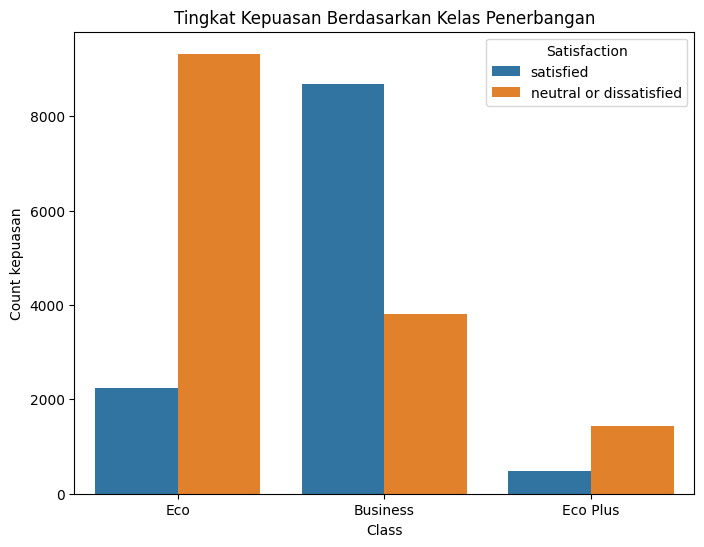

In [52]:

# Membuat plot tingkat kepuasan berdasarkan kelas penerbangan
plt.figure(figsize=(8, 6))
sns.countplot(data=df_airlines, x='Class', hue='satisfaction')
plt.title('Tingkat Kepuasan Berdasarkan Kelas Penerbangan')
plt.xlabel('Class')
plt.ylabel('Count kepuasan')
plt.legend(title='Satisfaction')
plt.show()


```
1. Tingkat Kepuasan Berdasarkan Kelas Penerbangan:
Business Class:
3,809 penumpang di kelas Business merasa neutral or dissatisfied.
8,686 penumpang di kelas Business merasa satisfied.
Insight: Mayoritas penumpang di kelas Business lebih puas, dengan rasio puas yang jauh lebih tinggi daripada yang merasa tidak puas. Hal ini menunjukkan bahwa kelas Business memberikan layanan yang lebih baik dan lebih mampu memenuhi harapan penumpang dibandingkan kelas lainnya.

Economy Class:
9,322 penumpang di kelas Economy merasa neutral or dissatisfied.
2,242 penumpang di kelas Economy merasa satisfied.
Insight: Sebagian besar penumpang di kelas Economy merasa tidak puas. Rasio antara penumpang yang tidak puas dibandingkan dengan yang puas cukup tinggi, menunjukkan bahwa kelas Economy memiliki tingkat kepuasan yang rendah dibandingkan kelas lainnya, kemungkinan karena keterbatasan kenyamanan atau layanan yang disediakan.

Economy Plus:
1,442 penumpang di kelas Economy Plus merasa neutral or dissatisfied.
475 penumpang di kelas Economy Plus merasa satisfied.
Insight: Kelas Economy Plus juga memiliki lebih banyak penumpang yang merasa tidak puas. Meskipun menawarkan sedikit lebih banyak kenyamanan dibandingkan kelas Economy, masih ada lebih banyak penumpang yang tidak puas dibandingkan yang puas.

2. Perbandingan Kepuasan Antar Kelas:
Business Class memiliki jumlah penumpang yang puas jauh lebih besar dibandingkan yang tidak puas, dengan rasio kepuasan lebih tinggi dibandingkan kelas lain.
Economy Class memiliki rasio ketidakpuasan tertinggi, dengan lebih dari 80% penumpang merasa tidak puas.
Economy Plus, meskipun menawarkan layanan yang lebih baik daripada kelas Economy, masih memiliki lebih banyak penumpang yang tidak puas daripada yang puas.

Kesimpulan:
Kelas penerbangan sangat mempengaruhi kepuasan penumpang. Business Class cenderung memberikan pengalaman yang jauh lebih memuaskan bagi penumpang dibandingkan kelas lain.
Economy Class memiliki tingkat ketidakpuasan tertinggi, mungkin karena layanan yang lebih terbatas dibandingkan kelas lainnya. Maskapai dapat memfokuskan perbaikan pada kelas Economy untuk meningkatkan kepuasan.
Economy Plus, meskipun memberikan peningkatan dibandingkan Economy biasa, masih belum cukup untuk membuat sebagian besar penumpang merasa puas. Peningkatan lebih lanjut mungkin diperlukan untuk membuat layanan ini lebih kompetitif.

Potensi tindakan:
Economy memerlukan perhatian lebih dalam meningkatkan pengalaman penumpang.
```

### 2. Mengetahui layanan service yang perlu ditingkatkan 

In [43]:
# Menghitung rata-rata penilaian layanan untuk setiap tingkat kepuasan
service_columns = ['Inflight wifi service', 'Seat comfort', 'Food and drink', 'Inflight entertainment', 'Leg room service']
average_service_ratings = df_airlines.groupby('satisfaction')[service_columns].mean()
print(average_service_ratings)

                         Inflight wifi service  Seat comfort  Food and drink  \
satisfaction                                                                   
neutral or dissatisfied               2.393536      3.044878        2.959926   
satisfied                             3.148031      3.965974        3.541787   

                         Inflight entertainment  Leg room service  
satisfaction                                                       
neutral or dissatisfied                2.885473          2.988952  
satisfied                              3.961326          3.811804  


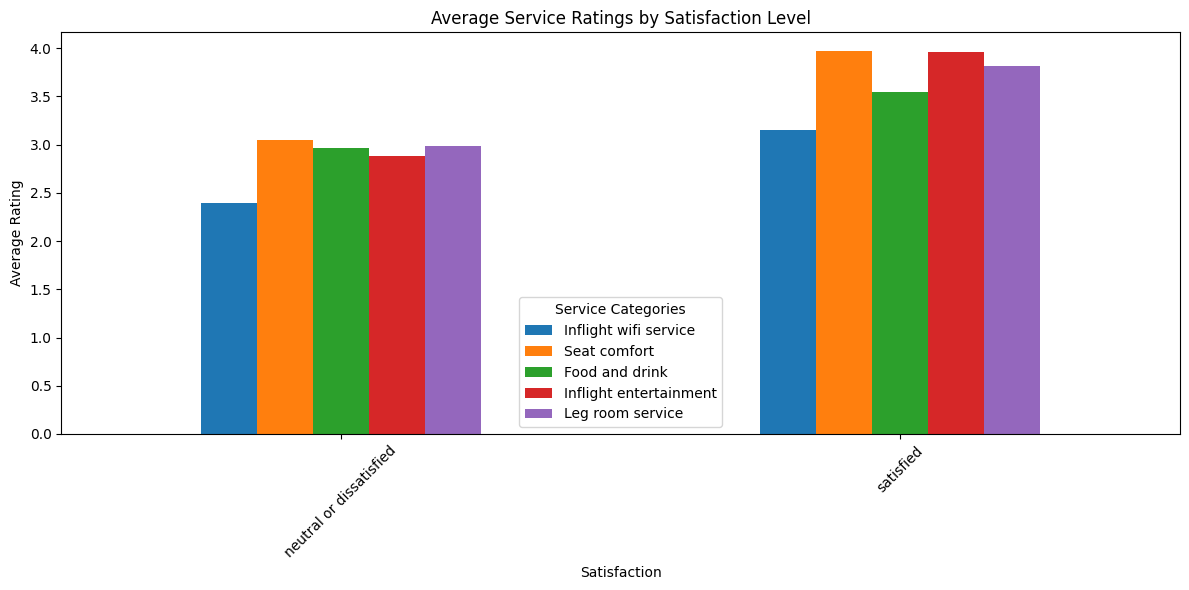

In [44]:
import matplotlib.pyplot as plt

# Mmembuat plot
ax = average_service_ratings.plot(kind='bar', figsize=(12, 6))
plt.title('Average Service Ratings by Satisfaction Level')
plt.xlabel('Satisfaction')
plt.ylabel('Average Rating')
plt.legend(title='Service Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

```
Insight Utama:
Inflight Wi-Fi Service:
Penumpang yang puas memberikan rata-rata skor 3.15, sedangkan yang netral atau tidak puas memberikan skor lebih rendah, yaitu 2.39.
Ini menunjukkan bahwa layanan Wi-Fi berkontribusi cukup signifikan terhadap kepuasan. Peningkatan kualitas Wi-Fi dapat menjadi area perbaikan untuk meningkatkan kepuasan pelanggan yang merasa kurang puas.

Seat Comfort:
Penumpang yang puas memberikan skor 3.97, sementara yang netral atau tidak puas memberikan skor 3.04.
Kenyamanan kursi merupakan salah satu aspek yang paling signifikan dalam membedakan tingkat kepuasan. Pelanggan yang puas cenderung merasa kursi jauh lebih nyaman dibandingkan mereka yang tidak puas.

Food and Drink:
Penumpang yang puas memberikan skor 3.54, sedangkan penumpang yang netral atau tidak puas memberikan skor 2.96.
Perbedaan skor ini menunjukkan bahwa kualitas makanan dan minuman memiliki dampak moderat pada kepuasan. Meningkatkan kualitas atau variasi makanan dapat meningkatkan pengalaman penumpang.

Inflight Entertainment:
Penumpang yang puas memberikan skor 3.96, sementara penumpang yang netral atau tidak puas hanya memberikan skor 2.88.
Hiburan dalam penerbangan tampaknya memainkan peran penting dalam memengaruhi kepuasan pelanggan. Penumpang yang puas cenderung lebih menghargai kualitas atau variasi hiburan yang tersedia.

Leg Room Service:
Penumpang yang puas memberikan skor 3.81, sedangkan yang tidak puas atau netral memberikan skor 2.99. Ruang kaki juga merupakan faktor yang sangat penting dalam mempengaruhi kepuasan. Perbedaan skor ini menunjukkan bahwa penumpang yang puas merasakan ruang kaki yang lebih nyaman.

Kesimpulan:
Layanan yang Paling Berpengaruh: Layanan dengan perbedaan skor terbesar antara penumpang yang puas dan tidak puas adalah kenyamanan kursi dan hiburan dalam penerbangan. Ini menunjukkan bahwa penumpang yang puas merasa kursi lebih nyaman dan hiburan lebih memadai dibandingkan mereka yang tidak puas. Peningkatan di area ini dapat membawa perbaikan signifikan pada tingkat kepuasan secara keseluruhan.

Layanan dengan Pengaruh Sedang: Makanan dan minuman, serta ruang kaki, memiliki perbedaan yang cukup signifikan dalam penilaian, tetapi dampaknya sedikit lebih rendah dibandingkan dengan kursi dan hiburan.

Layanan Wi-Fi Perlu Peningkatan: Meskipun Wi-Fi dalam penerbangan mendapatkan skor lebih tinggi dari penumpang yang puas, perbedaannya tidak sebesar layanan lainnya. Peningkatan kualitas Wi-Fi dapat meningkatkan kepuasan penumpang yang kurang puas atau netral.

Potensi tindakan:
Aspek-aspek seperti kenyamanan kursi, hiburan dalam penerbangan, dan ruang kaki memainkan peran penting dalam memengaruhi kepuasan pelanggan. Maskapai dapat memfokuskan peningkatan di area ini untuk meningkatkan pengalaman penumpang secara keseluruhan. Di sisi lain, layanan Wi-Fi juga perlu diperhatikan, terutama karena penumpang yang tidak puas memberikan skor rendah di area ini. Peningkatan layanan ini dapat memberikan dampak positif yang signifikan terhadap kepuasan pelanggan secara keseluruhan.
```

### 3. Jenis penundaan mana (keberangkatan vs kedatangan) yang memiliki pengaruh lebih kuat terhadap kepuasan

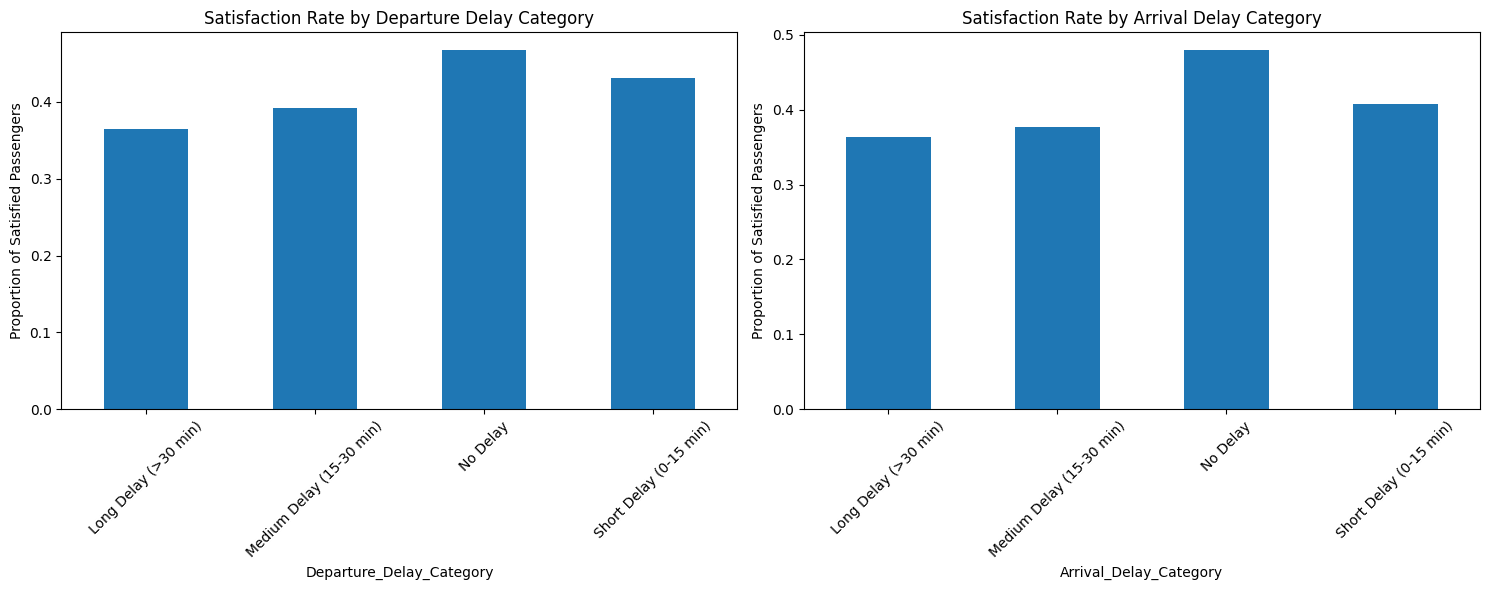


Satisfaction rates by Departure Delay Category:
Departure_Delay_Category
Long Delay (>30 min)        0.365
Medium Delay (15-30 min)    0.392
No Delay                    0.467
Short Delay (0-15 min)      0.431
Name: satisfied, dtype: float64

Satisfaction rates by Arrival Delay Category:
Arrival_Delay_Category
Long Delay (>30 min)        0.364
Medium Delay (15-30 min)    0.376
No Delay                    0.479
Short Delay (0-15 min)      0.407
Name: satisfied, dtype: float64


In [45]:

# Menghitung delay analisis 
delay_analysis = df_airlines.groupby('satisfaction')[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()

# Membuat function delay kategori dan kepuasan rates 
def categorize_delay(minutes):
    if minutes <= 0:
        return 'No Delay'
    elif minutes <= 15:
        return 'Short Delay (0-15 min)'
    elif minutes <= 30:
        return 'Medium Delay (15-30 min)'
    else:
        return 'Long Delay (>30 min)'

# Membuat delay kategori
df_airlines['Departure_Delay_Category'] = df_airlines['Departure Delay in Minutes'].apply(categorize_delay)
df_airlines['Arrival_Delay_Category'] = df_airlines['Arrival Delay in Minutes'].apply(categorize_delay)

# Menghitung kepuasan rates by delay kategori
departure_satisfaction = df_airlines.groupby('Departure_Delay_Category')['satisfaction'].value_counts(normalize=True).unstack()
arrival_satisfaction = df_airlines.groupby('Arrival_Delay_Category')['satisfaction'].value_counts(normalize=True).unstack()

# Kepuasan rates by delay kategori
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

departure_satisfaction['satisfied'].plot(kind='bar', ax=ax1)
ax1.set_title('Satisfaction Rate by Departure Delay Category')
ax1.set_ylabel('Proportion of Satisfied Passengers')
ax1.tick_params(axis='x', rotation=45)

arrival_satisfaction['satisfied'].plot(kind='bar', ax=ax2)
ax2.set_title('Satisfaction Rate by Arrival Delay Category')
ax2.set_ylabel('Proportion of Satisfied Passengers')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nSatisfaction rates by Departure Delay Category:")
print(departure_satisfaction['satisfied'].round(3))
print("\nSatisfaction rates by Arrival Delay Category:")
print(arrival_satisfaction['satisfied'].round(3))

In [ ]:
df_airlines.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure_Delay_Category,Arrival_Delay_Category
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,Long Delay (>30 min),Long Delay (>30 min)
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,No Delay,No Delay
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,No Delay,No Delay
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,No Delay,Short Delay (0-15 min)
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,No Delay,Medium Delay (15-30 min)


```
Terdapat penambahan kolom Departure_Delay_Category untuk memberikan gambaran umum yang lebih terstruktur, sehingga memudahkan dalam mengambil keputusan manajerial berdasarkan hasil analisis tersebut.

1. Insight dari Keterlambatan Keberangkatan (Departure Delay):
Kategori keterlambatan keberangkatan:

No Delay (tidak ada keterlambatan): Tingkat kepuasan tertinggi sebesar 46.7%.
Short Delay (0-15 menit): Kepuasan mencapai 43.1%, sedikit lebih rendah dibandingkan tanpa keterlambatan.
Medium Delay (15-30 menit): Kepuasan menurun menjadi 39.2%.
Long Delay (>30 menit): Kepuasan terendah di angka 36.5%.
Insight:

Keterlambatan keberangkatan sangat memengaruhi kepuasan pelanggan. Semakin lama keterlambatan, semakin rendah tingkat kepuasan.
Penumpang yang tidak mengalami keterlambatan keberangkatan cenderung paling puas (46.7%), sedangkan mereka yang mengalami keterlambatan lebih dari 30 menit memiliki tingkat kepuasan terendah (36.5%).
Ini menunjukkan bahwa maskapai perlu memperhatikan manajemen waktu keberangkatan untuk meningkatkan kepuasan pelanggan. Mengurangi keterlambatan, terutama keterlambatan panjang, dapat meningkatkan pengalaman pelanggan.

2. Insight dari Keterlambatan Kedatangan (Arrival Delay):
Kategori keterlambatan kedatangan:

No Delay (tidak ada keterlambatan): Tingkat kepuasan tertinggi sebesar 47.9%.
Short Delay (0-15 menit): Kepuasan turun menjadi 40.7%.
Medium Delay (15-30 menit): Kepuasan lebih rendah lagi di 37.6%.
Long Delay (>30 menit): Kepuasan terendah di 36.4%.

Kesimpulan:
Sama seperti keberangkatan, semakin lama keterlambatan kedatangan, semakin rendah tingkat kepuasan pelanggan. Penumpang yang tidak mengalami keterlambatan kedatangan cenderung paling puas (47.9%), sedangkan mereka yang mengalami keterlambatan lebih dari 30 menit memiliki tingkat kepuasan terendah (36.4%).
Keterlambatan yang singkat (0-15 menit) masih menunjukkan penurunan kepuasan yang signifikan dibandingkan dengan tidak ada keterlambatan, menandakan bahwa meskipun penumpang lebih toleran terhadap keterlambatan pendek, tetap ada dampak pada tingkat kepuasan.

Potensi tindakan
mengoptimalkan jadwal penerbangan untuk meminimalkan keterlambatan, terutama yang lebih dari 30 menit, guna mempertahankan atau meningkatkan tingkat kepuasan pelanggan. Kepuasan penumpang sangat sensitif terhadap keterlambatan penerbangan, baik saat keberangkatan maupun kedatangan. Semakin lama penumpang menunggu, semakin besar kemungkinan mereka merasa tidak puas.
```

### 4. Berapa presentase kepuasan loyal customer dan disloyal customer

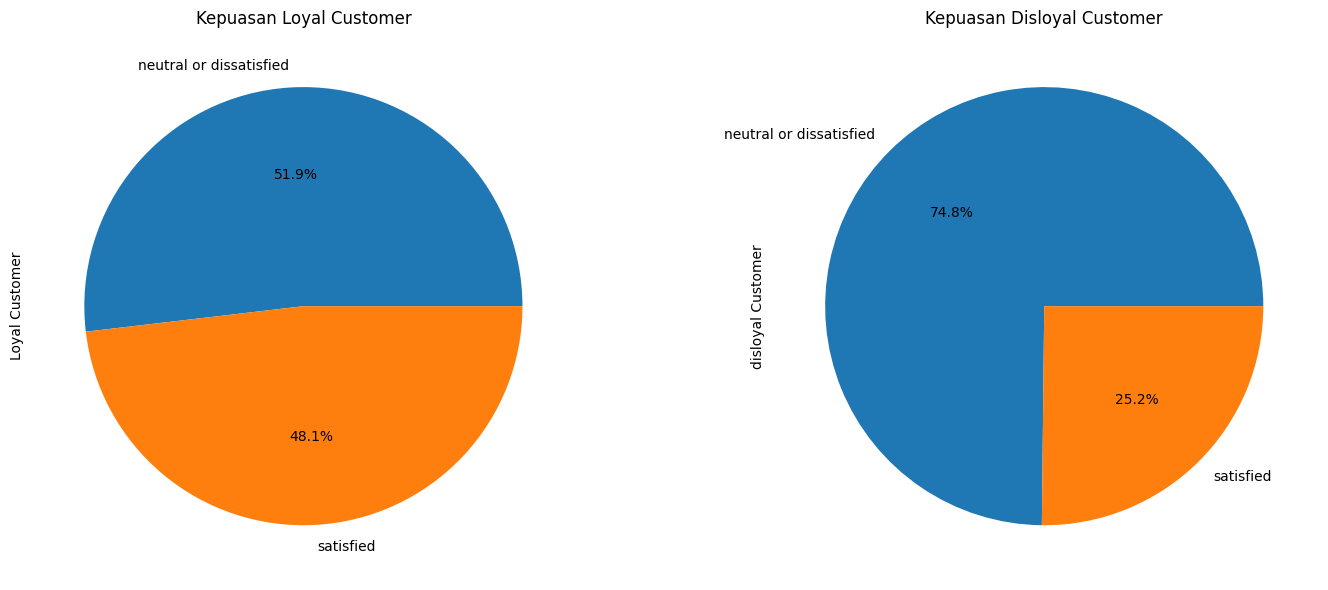

In [47]:
# Visualisasi dengan pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart untuk Loyal Customer
satisfaction_by_customer_type.loc['Loyal Customer'].plot(kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Kepuasan Loyal Customer')

# Pie chart untuk disloyal Customer
satisfaction_by_customer_type.loc['disloyal Customer'].plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Kepuasan Disloyal Customer')

plt.tight_layout()
plt.show()

```

1. Loyal Customer:
51.86% dari pelanggan setia merasa neutral or dissatisfied.
48.14% dari pelanggan setia merasa satisfied.

Insight:
Pelanggan setia memiliki distribusi kepuasan yang lebih seimbang, dengan hampir setengah dari mereka merasa puas (48.14%).
Meski begitu, 51.86% dari pelanggan setia masih merasa tidak puas atau netral, yang menunjukkan bahwa meskipun loyalitas pelanggan tinggi, layanan maskapai masih bisa diperbaiki untuk meningkatkan kepuasan pelanggan setia.

2. Disloyal Customer:
74.83% dari pelanggan tidak setia merasa neutral or dissatisfied.
25.17% dari pelanggan tidak setia merasa satisfied.

Insight:
Sebagian besar pelanggan yang tidak setia (74.83%) merasa tidak puas atau netral. Ini mengindikasikan bahwa pelanggan yang tidak setia lebih cenderung memiliki pengalaman yang kurang memuaskan dengan maskapai.
Hanya 25.17% dari mereka yang merasa puas, yang menunjukkan bahwa ketidakpuasan mendominasi di antara kelompok pelanggan yang tidak setia, dan layanan yang diterima mungkin tidak memotivasi mereka untuk menjadi pelanggan setia di masa depan.

Kesimpulan:
Loyal Customer: Walaupun hampir separuh pelanggan setia merasa puas, masih ada ruang untuk peningkatan layanan untuk memaksimalkan kepuasan mereka. Pelanggan yang puas lebih mungkin untuk tetap setia dan melakukan perjalanan lebih sering.

Disloyal Customer: Mayoritas pelanggan yang tidak setia merasa tidak puas, yang menandakan bahwa mereka tidak terkesan dengan layanan yang diberikan. Untuk menarik pelanggan ini menjadi lebih loyal, maskapai harus meningkatkan pengalaman mereka dan berusaha memenuhi ekspektasi mereka lebih baik.

Potensi tindakan: Maskapai perlu memperhatikan kedua kelompok ini. Mereka dapat memperkuat kepuasan pelanggan setia dengan meningkatkan kualitas layanan, sementara pada saat yang sama fokus pada meningkatkan pengalaman pelanggan tidak setia agar dapat mengubah mereka menjadi pelanggan yang lebih loyal.
```

# 6. Pengambilan kesimpulan dan Visualisasi data

```
Dari segi data, informasi mengenai data types menunjukkan bahwa tipe integer, float, dan object sudah sesuai dengan peruntukannya. Namun, ditemukan 83 missing values pada kolom Arrival Delay in Minutes, yang perlu ditangani. Di kolom Arrival Delay in Minutes memiliki nilai skew 6.9 sehingga terindikasi distribusi data tidak normal sehingga untuk mengisi nilai missing digunakan nilai median sebagai representatif missing value. Terdapat penambahan kolom Departure_Delay_Category untuk memberikan gambaran umum yang lebih terstruktur, sehingga memudahkan dalam mengambil keputusan manajerial berdasarkan hasil analisis tersebut. 

Berdasarkan analisis, terlihat bahwa tingkat kepuasan penumpang sangat dipengaruhi oleh berbagai faktor, seperti kelas penerbangan, keterlambatan, dan jenis layanan yang diberikan. Penumpang di kelas Business cenderung lebih puas dibandingkan dengan kelas Economy dan Economy Plus, menunjukkan bahwa layanan yang lebih baik dan kenyamanan yang lebih tinggi berkontribusi signifikan terhadap kepuasan. Keterlambatan penerbangan, terutama yang lebih dari 30 menit, menurunkan kepuasan secara drastis, baik untuk keberangkatan maupun kedatangan. Faktor-faktor seperti kenyamanan kursi, hiburan dalam penerbangan, dan ruang kaki juga memiliki dampak besar terhadap tingkat kepuasan, sementara Wi-Fi dan makanan masih bisa ditingkatkan. Loyalitas pelanggan juga memainkan peran penting, di mana pelanggan setia memiliki kepuasan yang lebih tinggi dibandingkan pelanggan tidak setia. Secara keseluruhan, maskapai dapat meningkatkan kepuasan pelanggan dengan fokus pada peningkatan layanan di kelas Economy dan Economy Plus, meminimalisir keterlambatan, serta memperbaiki kualitas layanan yang berkaitan dengan kenyamanan dan hiburan.
```

``` https://public.tableau.com/views/MilestoneP0/DashboardKepuasanPenumpangMaskapai?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link ```